# Simple Routing Situation

## Dijkstra Algorithm Approach

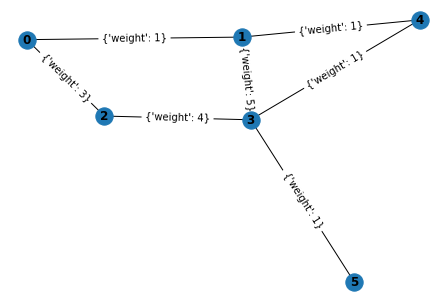

[0, 1, 4, 3, 5]
Time taken for Dijkstra Algorithm:
0.00018835067749023438
4


In [ ]:
# Implementing Dijkstra's Algorithm
import time
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)



G.add_edge(0,1,weight=1)
G.add_edge(0,2,weight=3)
G.add_edge(1,3,weight=5)
G.add_edge(2,3,weight=4)
G.add_edge(1,4,weight=1)
G.add_edge(3,4,weight=1)
G.add_edge(3,5,weight=1)


pos=nx.spring_layout(G,scale=3)
nx.draw(G,pos,with_labels=True,font_weight='bold')
edge_labels=nx.get_edge_attributes(G,'r')
nx.draw_networkx_edge_labels(G,pos)
plt.show()

start=time.time()
print(nx.shortest_path(G,0,5,weight='weight'))
end=time.time()
print('Time taken for Dijkstra Algorithm:')
print(end-start)
dijkstra_time=end-start
print(nx.nx.shortest_path_length(G,0,5,weight='weight'))

## Q Learning Approach

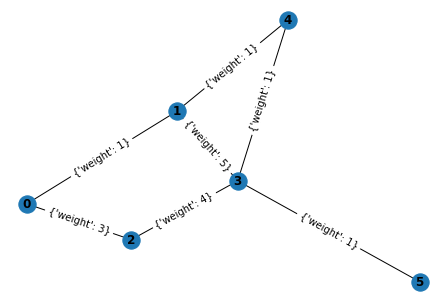

Q matrix trained :
[[  0.    86.45  81.19   0.     0.     0.  ]
 [  0.     0.     0.    90.1   90.5    0.  ]
 [  0.     0.     0.    90.1    0.     0.  ]
 [  0.     0.     0.     0.     0.   100.  ]
 [  0.     0.     0.    95.     0.     0.  ]
 [  0.     0.     0.     0.     0.   100.  ]]


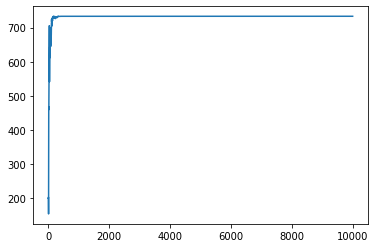

Shortest path:
[0, 1, 4, 3, 5]
Time Elapsed in finding shortest path:
0.00010275840759277344


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx

import matplotlib.pyplot as plt

G=nx.Graph()


G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)



G.add_edge(0,1,weight=1)
G.add_edge(0,2,weight=3)
G.add_edge(1,3,weight=5)
G.add_edge(2,3,weight=4)
G.add_edge(1,4,weight=1)
G.add_edge(3,4,weight=1)
G.add_edge(3,5,weight=1)


pos=nx.spring_layout(G,scale=3)
nx.draw(G,pos,with_labels=True,font_weight='bold')
edge_labels=nx.get_edge_attributes(G,'r')
nx.draw_networkx_edge_labels(G,pos)
plt.show()

RMatrix = np.matrix([ [-1,50,1,-1,-1,-1],
		[-1,-1,-1,1,50,-1],
		[-1,-1,-1,1,-1,-1],
		[-1,-1,-1,-1,-1,100],
		[-1,-1,-1,50,-1,-1],
		[-1,-1,-1,-1,-1,100] ])
'''
RMatrix=np.matrix(np.zeros(shape=(6,6)))
for x in G[5]:
  RMatrix[x,5]=100
print('Reward Matrix :')
print(RMatrix)
'''
QMatrix = np.matrix(np.zeros([6,6]))


gamma = 0.9


InitialState = 0

def AllActions(state):
    CurrentState = RMatrix[state,]
    AllAct = np.where(CurrentState >= 0)[1]
    return AllAct

AvAct = AllActions(InitialState) 

def NextAction(AvActRange):
    NextAct = int(np.random.choice(AvAct,1))
    return NextAct

Action = NextAction(AvAct)

def Update(CurrentState, Action, gamma):
    
    MaxIndex = np.where(QMatrix[Action,] == np.max(QMatrix[Action,]))[1]

    if MaxIndex.shape[0] > 1:
        MaxIndex = int(np.random.choice(MaxIndex, size = 1))
    else:
        MaxIndex = int(MaxIndex)
    MaxValue = QMatrix[Action, MaxIndex]
    
    QMatrix[CurrentState, Action] = RMatrix[CurrentState, Action] + gamma * MaxValue

    #print('max_value', RMatrix[CurrentState, Action] + gamma * MaxValue)

    if (np.max(QMatrix) > 0):
      return(np.sum(QMatrix/np.max(QMatrix)*100))
    else:
      return (0)

Update(InitialState,Action,gamma)

scores=[]

for i in range(10000):
    CurrentState = np.random.randint(0, int(QMatrix.shape[0]))
    AvAct = AllActions(CurrentState)
    Action = NextAction(AvAct)
    score=Update(CurrentState,Action,gamma)
    scores.append(score)
    #print ('Score:', str(score))

    
print("Q matrix trained :")
print(QMatrix/np.max(QMatrix)*100)

CurrentState = 0
Steps = [CurrentState]

while CurrentState != 5:
    startr=time.time()
    NextStepIndex = np.where(QMatrix[CurrentState,] == np.max(QMatrix[CurrentState,]))[1]
    
    if NextStepIndex.shape[0] > 1:
        NextStepIndex = int(np.random.choice(NextStepIndex, size = 1))
    else:
        NextStepIndex = int(NextStepIndex)
    
    Steps.append(NextStepIndex)
    CurrentState = NextStepIndex
endr=time.time()
plt.plot(scores)
plt.show()


print("Shortest path:")
print(Steps)

print('Time Elapsed in finding shortest path:')
print(endr-startr)

Reinforcment_time=endr-startr

## Bar Plot of comparison

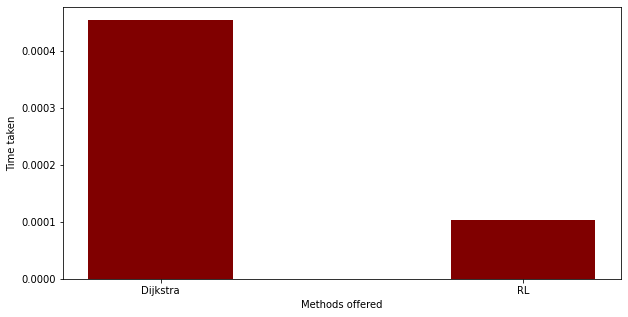

In [ ]:
methods=['Dijkstra','RL']
timers=[dijkstra_time,Reinforcment_time]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, timers, color ='maroon',
        width = 0.4)
 
plt.xlabel("Methods offered")
plt.ylabel("Time taken")
plt.show()

## Taking up BGP Design

In [ ]:
G=nx.Graph()


G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)
G.add_node(8)
G.add_node(9)


In [ ]:
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(3,6)
G.add_edge(3,5)
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(7,9)
G.add_edge(8,9)



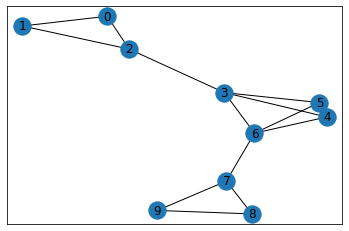

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [ ]:
RMatrix=np.matrix(np.zeros(shape=(10,10)))
for x in G[9]:
  RMatrix[x,9]=100
print('Reward Matrix :')
print(RMatrix)

Reward Matrix :
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [ ]:
QMatrix = np.matrix(np.zeros([10,10]))


gamma = 0.9


InitialState = 0

def AllActions(state):
    CurrentState = RMatrix[state,]
    AllAct = np.where(CurrentState >= 0)[1]
    return AllAct

AvAct = AllActions(InitialState) 

def NextAction(AvActRange):
    NextAct = int(np.random.choice(AvAct,1))
    return NextAct

Action = NextAction(AvAct)

def Update(CurrentState, Action, gamma):
    
    MaxIndex = np.where(QMatrix[Action,] == np.max(QMatrix[Action,]))[1]

    if MaxIndex.shape[0] > 1:
        MaxIndex = int(np.random.choice(MaxIndex, size = 1))
    else:
        MaxIndex = int(MaxIndex)
    MaxValue = QMatrix[Action, MaxIndex]
    
    QMatrix[CurrentState, Action] = RMatrix[CurrentState, Action] + gamma * MaxValue

    #print('max_value', RMatrix[CurrentState, Action] + gamma * MaxValue)

    if (np.max(QMatrix) > 0):
      return(np.sum(QMatrix/np.max(QMatrix)*100))
    else:
      return (0)

Update(InitialState,Action,gamma)

scores=[]

for i in range(10000):
    CurrentState = np.random.randint(0, int(QMatrix.shape[0]))
    AvAct = AllActions(CurrentState)
    Action = NextAction(AvAct)
    score=Update(CurrentState,Action,gamma)
    scores.append(score)
    #print ('Score:', str(score))

    
print("Q matrix trained :")
print(QMatrix/np.max(QMatrix)*100)

CurrentState = 0
Steps = [CurrentState]

while CurrentState != 5:
    startr=time.time()
    NextStepIndex = np.where(QMatrix[CurrentState,] == np.max(QMatrix[CurrentState,]))[1]
    
    if NextStepIndex.shape[0] > 1:
        NextStepIndex = int(np.random.choice(NextStepIndex, size = 1))
    else:
        NextStepIndex = int(NextStepIndex)
    
    Steps.append(NextStepIndex)
    CurrentState = NextStepIndex
endr=time.time()
plt.plot(scores)
plt.show()


print("Shortest path:")
print(Steps)

print('Time Elapsed in finding shortest path:')
print(endr-startr)

Reinforcment_time=endr-startr

Q matrix trained :
[[ 81.          80.9999956   80.9999889   81.          81.
   80.9999956   81.          90.          89.99998766  80.9999956 ]
 [ 81.          81.          80.9999956   81.          81.
   80.9999956   81.          90.          89.99998766  80.99999803]
 [ 81.          80.9999956   80.9999956   81.          81.
   80.9999956   80.9999956   89.99999511  89.99998766  80.99999803]
 [ 81.          80.9999956   80.9999956   80.9999926   81.
   80.9999956   80.9999956   90.          89.99998766  80.99999803]
 [ 81.          81.          80.9999956   81.          81.
   80.9999956   80.9999889   90.          89.99998766  80.99999803]
 [ 81.          81.          80.9999889   81.          81.
   80.9999956   81.          89.99999511  90.          80.99999803]
 [ 81.          81.          80.9999956   81.          80.9999926
   80.9999956   81.          90.          90.          80.99999803]
 [ 81.          80.9999956   80.9999956   81.          81.
   80.9999956   80.9999926